## WEEK 1 과제 

In [1]:
from glob import glob
glob('*')

['1.png', '2.png', 'HW1.ipynb', 'Week 1.ipynb']

In [2]:
from IPython.display import Image

### [1번 문제] ISL 3.5

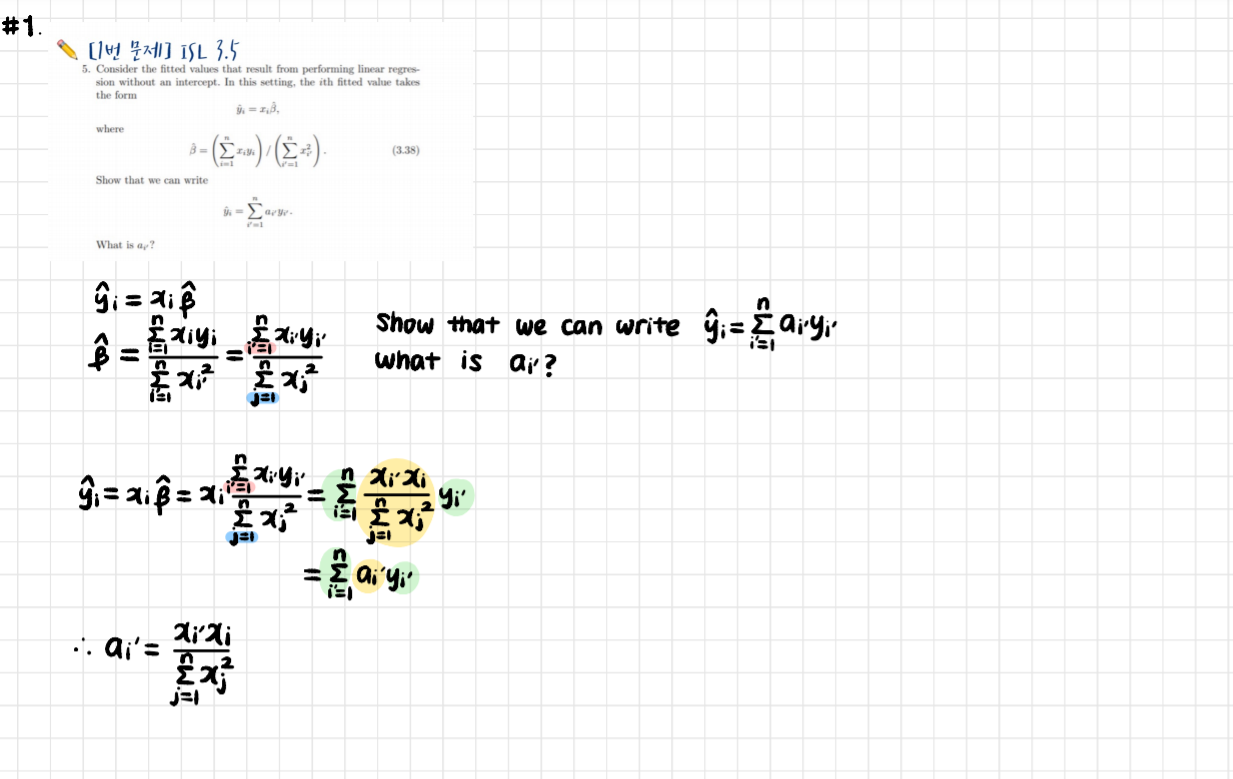

In [3]:
Image('1.png')

### [2번 문제] ESL 3.4

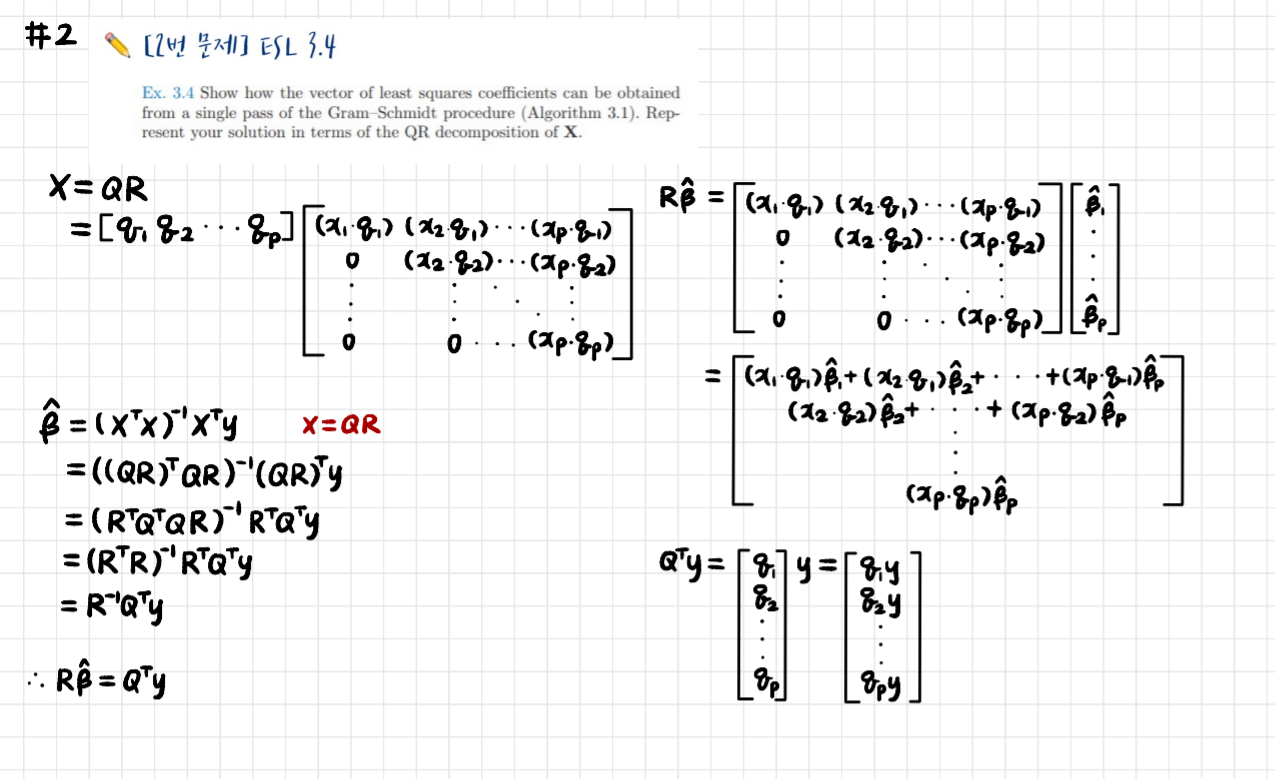

In [4]:
Image('2.png')

### [3번 문제]: Numpy만 이용해서 선형회귀 코드 짜기 

In [5]:
# Data Import
import ssl
import pandas as pd
ssl._create_default_https_context = ssl._create_unverified_context #Github에서 데이터를 바로 불러오도록 하는 세팅입니다. 해당 코드 무시하고 데이터 받아서 쓰셔도 됩니다!
data = pd.read_csv('https://github.com/YonseiESC/ESC-21SUMMER/blob/main/week1/HW/week1_data.csv?raw=True')
y = data['mpg']
x = data.drop(['mpg'],axis=1)

In [6]:
import numpy as np

In [7]:
# 데이터를 확인한다 
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82
393,44.0,4,97.0,52,2130,24.6,82
394,32.0,4,135.0,84,2295,11.6,82
395,28.0,4,120.0,79,2625,18.6,82


In [8]:
# 결측치 존재 여부 확인: 확인 결과 결측치가 존재하지 않음을 알 수 있다 
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
dtype: int64

In [9]:
# mpg, cylinders, displacement, wight, acceleration, year의 데이터 타입은 모두 float 혹은 int64 타입이나 horsepower 데이터는 object 타입이다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [10]:
# horsepower data만 object 타입이므로 내용을 확인해준다
print(data['horsepower'].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [11]:
# 숫자 데이터 중'?'가 존재하는 것을 알 수 있다 -> '?'가 존재하는 인덱스를 확인한다 
# 해당 인덱스의 값을 제거한다 -> 값이 제대로 제거되었는지 확인한다 (np.where 함수?)
index = data[data['horsepower']=='?'].index
data = data.drop(index)
print(data['horsepower'].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '100' '105' '175'
 '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54' '208'
 '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75' '91'
 '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115' '53'
 '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48' '66'
 '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64' '74'
 '116' '82']


In [12]:
# '?' 데이터를 제거하였기 때문에 'horsepower'의 데이터를 object -> float 타입으로 변경해준다 
data['horsepower'] = data['horsepower'].astype('float')

In [13]:
# 데이터 타입이 제대로 변환된 것을 확인할 수 있다 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


In [14]:
y = data['mpg']
x = data.drop(['mpg'],axis=1)

In [15]:
# beta와 y의 추정값을 반환하는 함수를 만들어 준다.
def YourOwnRegression(x,y):
    beta = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
    yhat = np.dot(x, beta)
    print(beta, yhat)

In [16]:
# 결과물 반환
YourOwnRegression(x,y)

[-0.5226089   0.01022108 -0.020873   -0.00639456 -0.05202195  0.61025869] [15.93081361 14.45720405 16.11263762 15.93670419 16.10071197 10.51021782
 10.27543153 10.53128391  9.67525181 13.49634208 15.59946068 15.17857818
 14.95056695 18.23756934 23.85149163 20.70116218 21.04691637 22.47738545
 25.4075601  27.85849004 21.93938914 23.54965655 23.61026333 24.5700506
 22.02475307  7.48992449  8.73758029  8.68094775  6.39448743 26.01781879
 25.50668622 25.43458909 22.95714525 17.50355598 18.56684981 18.98997897
 18.64504732 11.74185816 10.43958016 12.2762232  12.39844199  7.02172716
  8.71466792  6.09084578 20.89073634 24.7795066  18.89340516 20.0843144
 25.76559234 26.24104628 26.30753902 26.59195154 28.28090927 29.28279009
 28.2609542  27.13912286 25.6470868  26.69569542 26.07663641 24.9880403
 26.2074288  11.93647037 11.52899822 12.73330182 13.0723569  15.65493241
  9.60277136 10.60920749 10.79899231 10.95329347 25.45996983 14.19610698
 13.24891771 11.63170439 13.0781754  21.23759877 24.5